# Chapter 13: Least Squares Data Fitting

## 13.1 Least squares data fitting 

- $n$-vector $x$, representing some feature vector or independent variables
- scalar $y$, representing the outcome and response variable 

We believe $y$ and $x$ are related and we can approximately by some function $f: \R^n \to \R$: $y \approx f(x)$. 

**Model.** of the relationship between $x$ and $y$, given by $y \approx \hat f(x)$ where $\hat f: \R^n \to \R$. We write $\hat y = \hat f(x)$, where $\hat y$ is the prediction of the outcome $y$ given $x$. 

**Linear in the parameters model.**
We focus on a specific form for the model 

\begin{align}
\hat f(x)  = \theta_1 f_1(x) + \dots + \theta_p f_p(x)
\end{align}

where $f_i: \R^n \to \R$ are *basis functions* or *feature mappings* and $\theta_i$ are the model parameters we choose.

**Prediction error** Goal: choose $\hat f$ so that it is consistent with the data ($y^{(i)} \approx \hat f(x^{(i)})$) 

*prediction error* or *residual*: $r = y - \hat y$

**Least squares model fitting**

Choose model parameters $\theta_1,\dots,\theta_p$ to minimize RMS prediction error $||r||^2$, which is a least squares problem. 

### 13.1.1 Fitting Univariate functions 

If $n = 1$, so feature vector $x$ is a scalar so $f$ becomes a univariate function. We can plot the points $(x^{(i)}, y^{(i)})$ as points on the x-y plane and $\hat f$ as a curve on that plane for visualization. 

**Straight-line fit** 

We have the form: 
\begin{align}
\hat f(x)  = \theta_1 + \theta_p x
\end{align}

We can solve for parameters using least squares: $A\bold{\theta} = y$ with A being: 
\begin{align}
A = \begin{bmatrix} 1 & x^{(1)} \\ 1 & x^{(2)} \\ \vdots & \vdots \\ 1 & x^{(N)} \\ \end{bmatrix} = \begin{bmatrix} 1 & x \end{bmatrix}
\end{align}

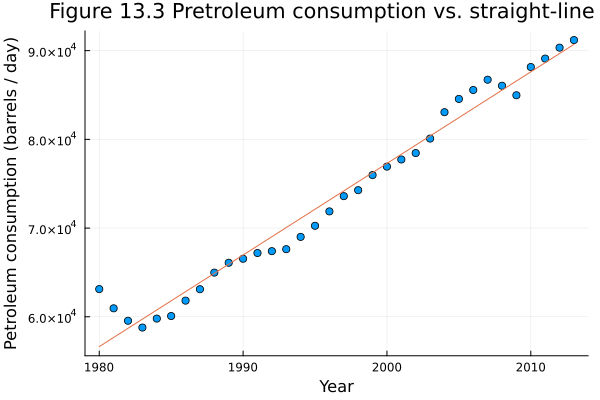

In [10]:
using VMLS 

# estimate of trend line applied to a time series (from 1980 to 2013) of petroleum consumption
consumption = petroleum_consumption_data()
n = length(consumption)
A = [ones(n) 1:n];
theta = A \ consumption;

using Plots 
scatter(1980:2013, consumption, legend=false, 
        title="Figure 13.3 Pretroleum consumption vs. straight-line fit",
        xlabel="Year", ylabel="Petroleum consumption (barrels / day)")
plot!(1980:2013, A*theta)

**Estimation of trend and seasonal component** Least squares fit of a trend plus a periodic component to a time series. In this case, the de-trended time series has a clear periodic component.

Example: Time series of vehicle miles traveled in the US, per month, from 2000-2014. In this example, a pattern can be seen repeating every year, with a peak in the summer and a minimum in the winter. Observed also is a slowly increasing long term trend. 

We use a model (estimating parameters with least squares) of a sum of two components: 

\begin{align}
y \approx \hat y = \hat y^{lin} + \hat y^{seas}, 
\end{align}

where $\hat y^{lin}$ and $\hat y^{seas}$ are defined as 

\begin{align}
\hat y^{seas} = \theta_1 \begin{bmatrix} 1\\2\\\vdots\\N \end{bmatrix}, \space \space \space
\hat y^{seas} = \begin{bmatrix} \theta_{2:(P+1)}\\\theta_{2:(P+1)}\\\vdots\\\theta_{2:(P+1)} \end{bmatrix}
\end{align}

The first component is just linear with slope $\theta_1$. The constant term in omitted because it would be redundant (can be described with other theta parameters). 

The second (periodic/seasonal) component with period $P=12$, and consists of the pattern ($\theta_2,\dots,\theta_{P+1}$) repeated $N/P$ times (we assume $N$ is a multiple of $P$).

Lead squares fit is computed with matrix A given by

\begin{align}
A = \begin{bmatrix} 1 & 1 & 0 & \dots & 0 \\
                    2 & 0 & 1 & \dots & 0 \\
                    \vdots & \vdots & \vdots & \ddots & \vdots \\
                    P & 0 & 0 & \dots & 1 \\
                    P+1 & 1 & 0 & \dots & 0 \\ 
                    \vdots & \vdots & \vdots & \ddots & \vdots \\
                    N - P + 2 & 0 & 1 & \dots & 0 \\
                    \vdots & \vdots & \vdots & \ddots & \vdots \\
                    N & 0 & 0 & \dots & 1
    \end{bmatrix}
\end{align}

The residual or prediction error is called the de-trended, seasonally adjusted, series.

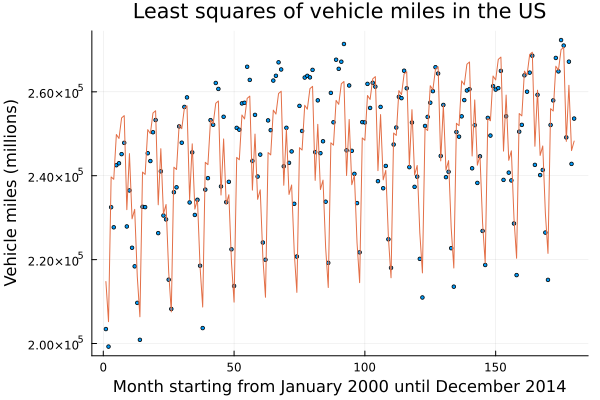

In [22]:
vmt = vehicle_miles_data() 
m,n = size(vmt)
sz = m*n
A = [0:(sz-1) vcat([eye(n) for i=1:m]...)]
b = reshape(vmt', sz, 1)
theta = A\b;

using Plots 
scatter(1:sz, b, markersize=2, legend=false,
        xlabel="Month starting from January 2000 until December 2014",
        ylabel="Vehicle miles (millions)",
        title="Least squares of vehicle miles in the US")
plot!(1:sz, A*theta)

**Polynomial fit.** Extension beyond straight-line, with $f_i(x) = x^{i-1}, \space i = 1,\dots,p$

so $\hat f$ is a polynomial of degree at most $p-1$,

\begin{align}
\hat f(x) = \theta_1 + \theta_2 x + \dots + \theta_p x^{p-1}
\end{align}

In this case,

\begin{align}
A = \begin{bmatrix}
    1 & x^{(1)} & \dots & (x^{(1)})^{p-1} \\
    1 & x^{(2)} & \dots & (x^{(2)})^{p-1} \\
    \vdots & \vdots & & \vdots \\
    1 & x^{(N)} & \dots & (x^{(N)})^{p-1} \\
    \end{bmatrix}
\end{align}

i.e., it is a Vandermonde matrix.

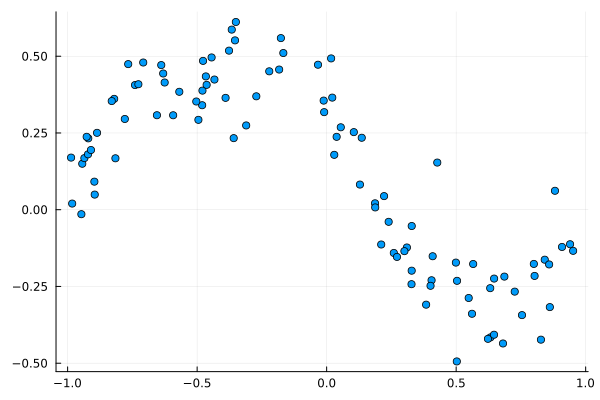

In [26]:
# generate data set in interval [-1, 1] and plot

m = 100;
x = -1 .+ 2*rand(m, 1);

# x^3 - x + .4 / (1 + 25x^2)
y = x.^3 - x + .4 ./ (1 .+ 25*x.^2) + .1*randn(m,1);

using Plots 
scatter(x,y,legend=false)

In [31]:
# function to fit polynomial coefficients using least squares. 
# p is the HIGHEST power/degree of the polynomial (add +1 for constant term)
polyfit(x,y,p) = vandermonde(x,p+1) \ y  # theta = A (vandermonde) \ y
theta2 = polyfit(x,y,2)
theta6 = polyfit(x,y,6)
theta10 = polyfit(x,y,10)
theta15 = polyfit(x,y,15);

thetas = [theta2, theta6, theta10, theta15];

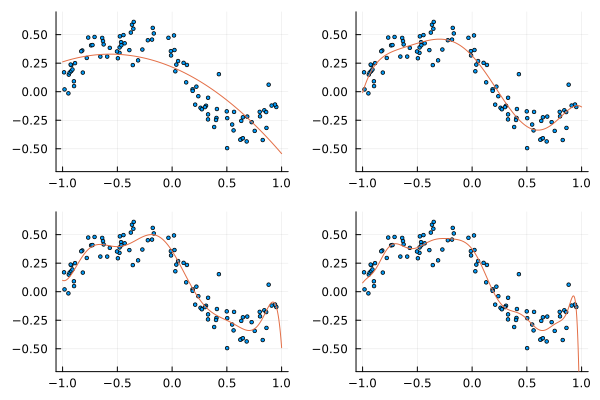

In [37]:
# function to evaluate polynomial (calculate y-hat) at all points in vector x 
polyeval(theta, x) = vandermonde(x, length(theta))*theta # computes Atheta = yhat
xplot = linspace(-1,1,1000);

using Plots 
p = plot(layout=4, legend=false, ylim=(-.7,.7))
for k=1:4
    scatter!(x,y, subplot=k, markersize=2)
    plot!(xplot, polyeval(thetas[k], xplot), subplot=k)
end

scatter!(title="")

**Piecewise-linear fit.** A *piecewise-linear* function, with *knot points* or *kink points* $a_1 < a_2 < \dots < a_k$ is a continuous function that is affine in between the knot points. We can describe any piecewise-linear function with $k$ knot points using $p = k+2$ basis functions 

\begin{align}
f_1(x) = 1, \space \space \space
f_2(x) = x, \space \space \space
f_{i+2}(x) = (x-a_i)_+, \space \space \space
i = 1,\dots,k
\end{align}

where $(u)_+0 = max\{u,0\}.$

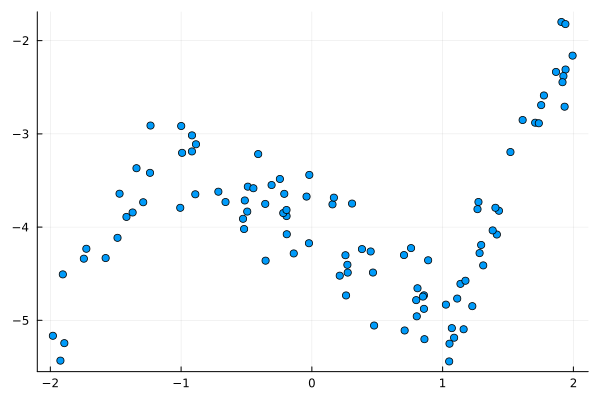

In [42]:
# generate random data  
m = 100; 
x = -2 .+ 4*rand(m,1);
y = 1 .+ 2*(x.-1) - 3*max.(x.+1,0) + 4*max.(x.-1,0) + .3*randn(m,1);

using Plots 
scatter(x,y,legend=false)

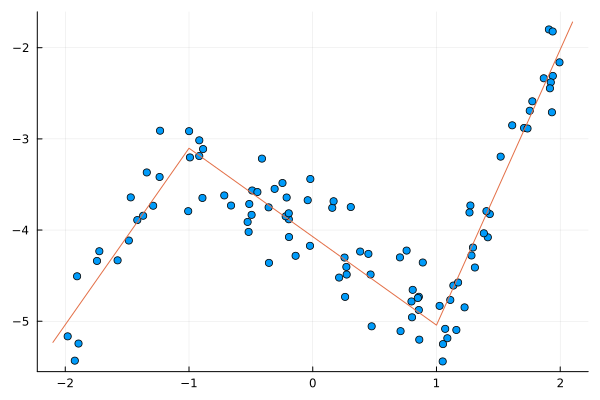

In [46]:
# least squares fitting 

A = [ones(m) x max.(x.+1,0) max.(x.-1,0)]
theta = A \ y

t = [-2.1, -1, 1, 2.1]
yhat = theta[1] .+ theta[2]*t + theta[3]*max.(t.+1,0) + theta[4]*max.(t.-1,0); 

scatter(x,y,legend=false)
plot!(t,yhat)

## 13.2 Validation

**Polynomial approximation** 
We use the same training set as above as the *training* set, and generate a *test* set of 100 randomly chosen points generated by the same method as used for the training set. We fit polynomials of degree $0, \dots, 20$ and compute RMS errors on the training set and test set. 

In [47]:
# generate data set in interval [-1, 1] and plot

m = 100;
x = -1 .+ 2*rand(m, 1);

# x^3 - x + .4 / (1 + 25x^2)
y = x.^3 - x + .4 ./ (1 .+ 25*x.^2) + .1*randn(m,1);

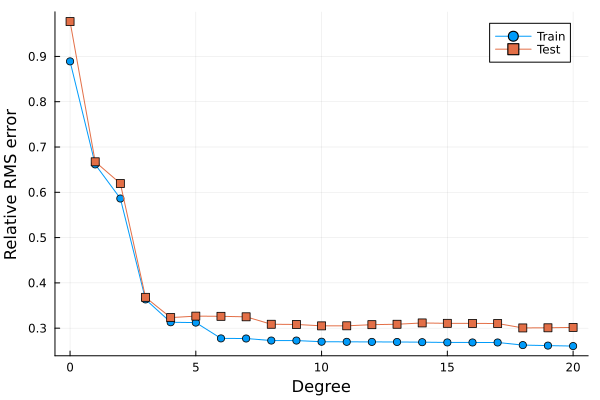

In [51]:
using LinearAlgebra
xtest = -1 .+ 2*rand(m, 1);
ytest = xtest.^3 - xtest + .4 ./ (1 .+ 25*xtest.^2) + .1*randn(m,1);

pmax = 21

error_train = zeros(pmax);
error_test = zeros(pmax);

for p = 1:pmax
    A = vandermonde(x,p)
    theta = A\y 
    error_train[p] = norm(A*theta-y) / norm(y)
    error_test[p] = norm(vandermonde(xtest, p) * theta - ytest) / norm(ytest)
end

plot(0:20, error_train, label = "Train", marker = :circle)
plot!(0:20, error_test, label = "Test", marker = :square)
plot!(xlabel="Degree", ylabel = "Relative RMS error")

**House price regression.** Simple regression model for predicting house sales price from area and number of bedrooms. 

\begin{align}
\hat y = v + \beta_1 x_1 + \beta_2 x_2,
\end{align}

where $\hat y$ is the predicted sales price, $x_1$ is the area, $x_2$ is the number of bedrooms. 

We will then apply cross-validation using five folds. 

In [52]:
D = house_sales_data(); 
area = D["area"]
beds = D["beds"]
price = D["price"]
m = length(price)

A = [ones(m) area beds]
theta = A\price

3-element Vector{Float64}:
  54.40167360394433
 148.72507260029033
 -18.853357877778716

In [53]:
rmserr = rms(price - A*theta)

74.84571649590144

In [54]:
std_prices = stdev(price)

112.78216159756509

In [71]:
# create the folds 
folds = 5;
nfold = div(m, folds)

import Random

I = Random.randperm(m)
coeff = zeros(folds,length(theta)); errors = zeros(folds,2);
for k=1:folds 
    if k == 1 
        train_idxs = I[nfold+1:end];
        test_idxs = I[1:nfold];
    elseif k == 5
        train_idxs = I[1:4*nfold];
        test_idxs = I[4*nfold+1:end];
    else 
        train_idxs = I[[1:(k-1)*nfold; k*nfold+1:m]];
        test_idxs = I[[(k-1)*nfold+1 ; k*nfold]];
    end;
    ntrain = length(train_idxs)
    ntest = length(test_idxs)

    theta = A[train_idxs,:] \ price[train_idxs]
    coeff[k,:] = theta
    rms_train = rms(A[train_idxs, :] * theta - price[train_idxs])
    rms_test = rms(A[test_idxs, :] * theta - price[test_idxs])
    errors[k, :] = [rms_train, rms_test]
end

In [72]:
coeff

5×3 Matrix{Float64}:
 47.2615  143.338  -14.0273
 55.8508  144.203  -17.158
 56.0952  160.328  -24.9991
 59.6756  148.352  -20.3825
 53.1273  149.005  -18.4306

In [73]:
errors

5×2 Matrix{Float64}:
 73.3918   80.688
 74.8239  263.702
 74.344    50.2002
 75.0863  118.87
 76.2926   68.9339